#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


Assignment done by Andrew Quan (asquan)

## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [141]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe

europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

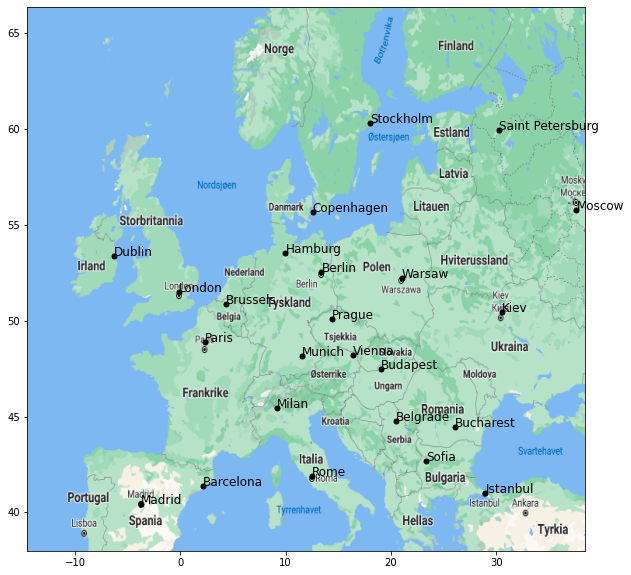

In [142]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [143]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


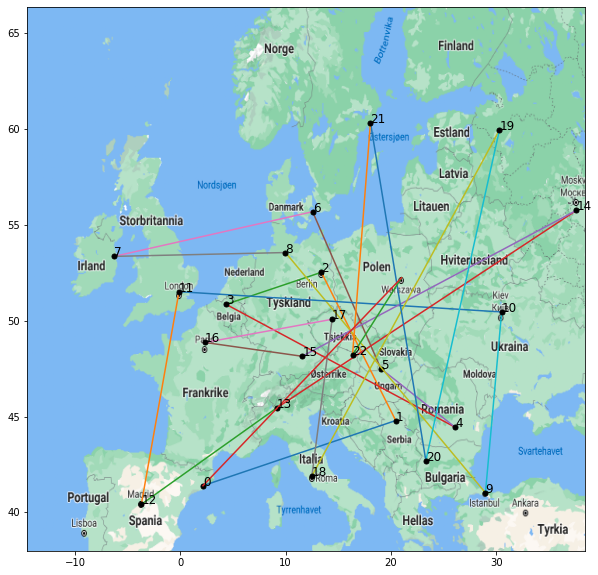

In [144]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

input cities: ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest']
optimized tour: ('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels')
time of completion: 0.02644038200378418
computed distance: 5018.8099999999995
----------------------------------
input cities: ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen']
optimized tour: ('Berlin', 'Copenhagen', 'Brussels', 'Barcelona', 'Belgrade', 'Bucharest', 'Budapest')
time of completion: 0.21690702438354492
computed distance: 5487.889999999999
----------------------------------
input cities: ['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin']
optimized tour: ('Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen')
time of completion: 2.1533114910125732
computed distance: 6667.489999999999
----------------------------------
input cities: ['Barcelona', 'Belgrade', 'Berlin', 'Brussels'

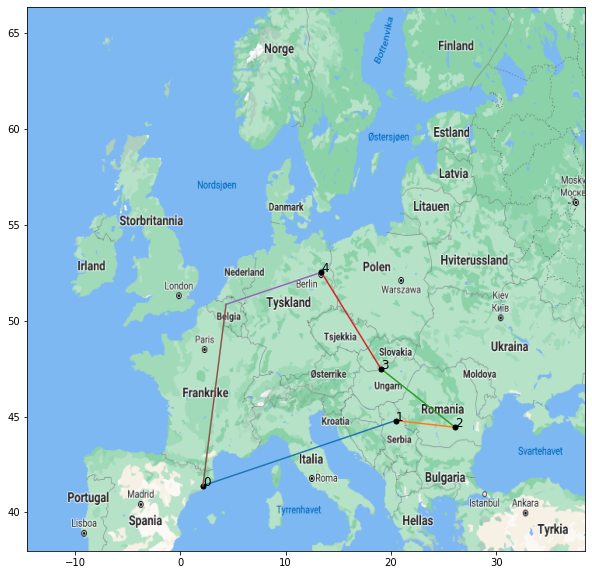

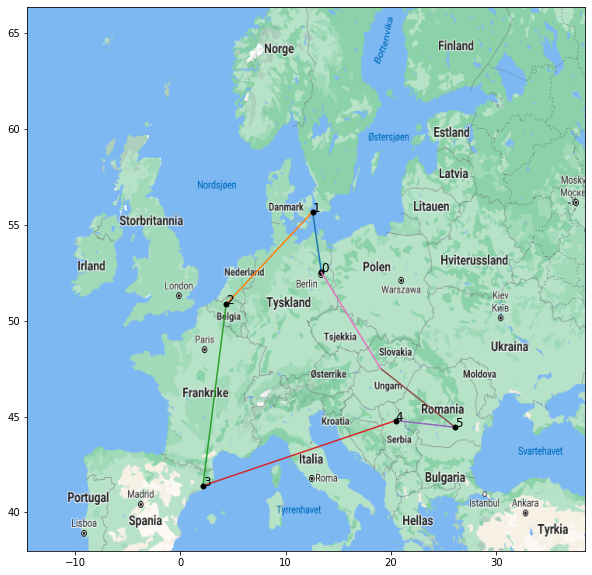

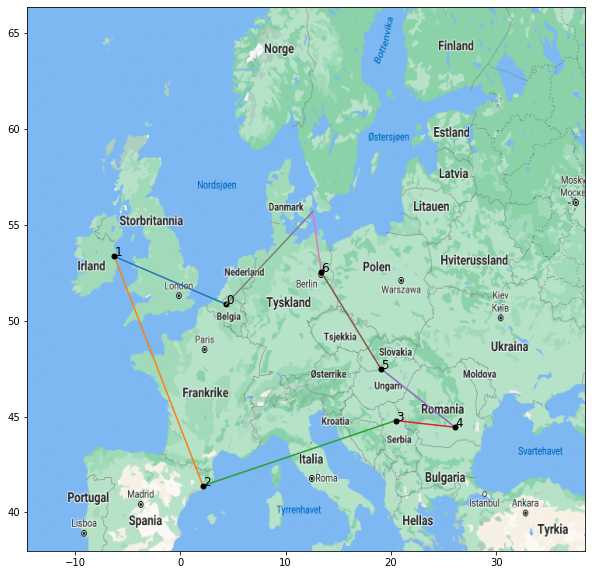

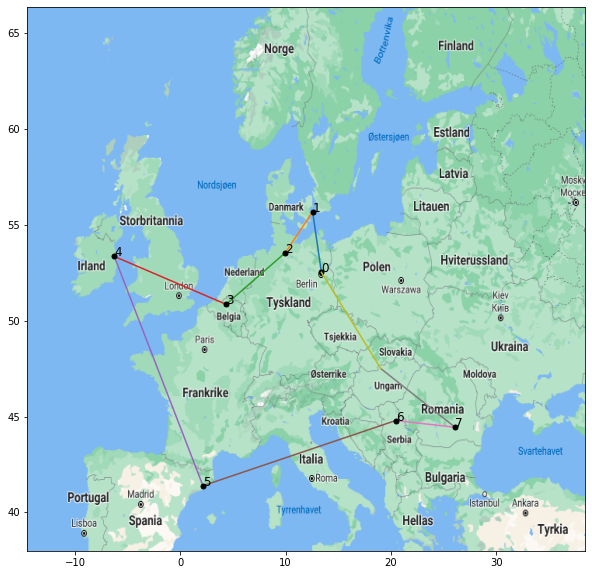

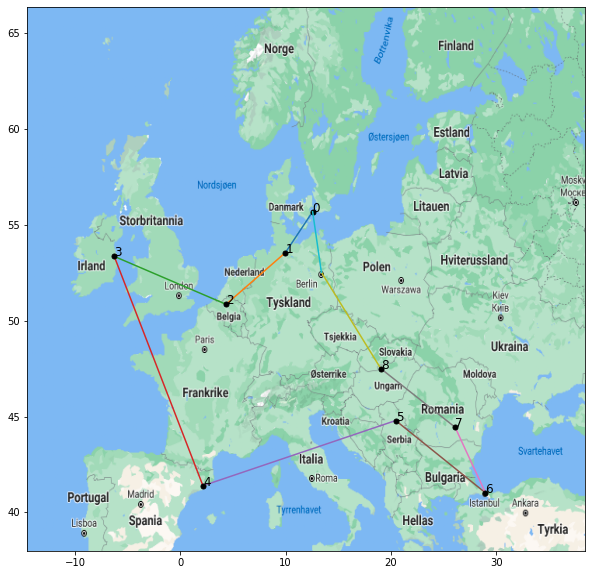

In [145]:
# Implement the algorithm here
from itertools import permutations
import time 

cities = list(city_coords.keys())
distances = data[1:]

def distance_function(permutation):
    """ Computes the distance of a tour/permutation of cities

    Uses the .csv file to retreive the distances between two cities

    Args:
        permutation : a list containing strings of the name of cities
    
    Returns:
        total_distance : the total distance of the tour / permutation as a number
    
    """
    total_distance = 0
    for i in range(len(permutation)):
        curr_city_ind = data[0].index(permutation[i])
        next_city_ind = data[0].index(permutation[(i + 1) % len(permutation)])
        current_distance = float(distances[curr_city_ind][next_city_ind])
        total_distance += current_distance
    return total_distance

    
def exhaustive_search(cities):
    """Performs an exhaustive search on a given permutation of cities

    Computes the distances of all possible tours 
    and looks for the tour with smallest total distance

    Args:
        cities: list of strings with the names of the cities
    
    Returns:
        path         :  a list of cities 
        best_distance:  the computed best distance 
        total_time   :  amount of time (seconds) the function took to complete
    """
    start = time.time()
    path = None
    best_distance = float("inf")
    perms = permutations(cities) #from itertools
    for permutation in perms:
        distance = distance_function(permutation)
        if distance < best_distance:
            best_distance = distance
            path = permutation
    stop = time.time()
    total_time = stop-start
    
    return path, best_distance, total_time


p, d, t = exhaustive_search(cities[0:6])


#incrementally adding cities up to 10
lst_of_cities = [cities[0:6], cities[0:7], cities[0:8], cities[0:9], cities[0:10]]
t = []
for j in lst_of_cities:
    path, best_distance, total_time = exhaustive_search(j)
    t.append(total_time)
    print("input cities:", j)
    print("optimized tour:", path)
    print("time of completion:", total_time)
    print("computed distance:", best_distance)
    print("----------------------------------")
    plot_plan(path)


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

We can calculate the computation time of all 24 cities by calculating the computation time between 2 cities, and multiplying it by 24!:
copmtation time in seconds: 4.1961669921875e-05
approximate seconds it would take to perform exhaustive search on all 24 cities: 2.603505103708509e+19 seconds
or 4.339175172847515e+17 minutes
------------
It took 200.0342662334442 seconds (or 3.3339044372240703 minutes) to find the shortest tour of the 10 first cities
cities:
['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul']
optimized tour:
('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')


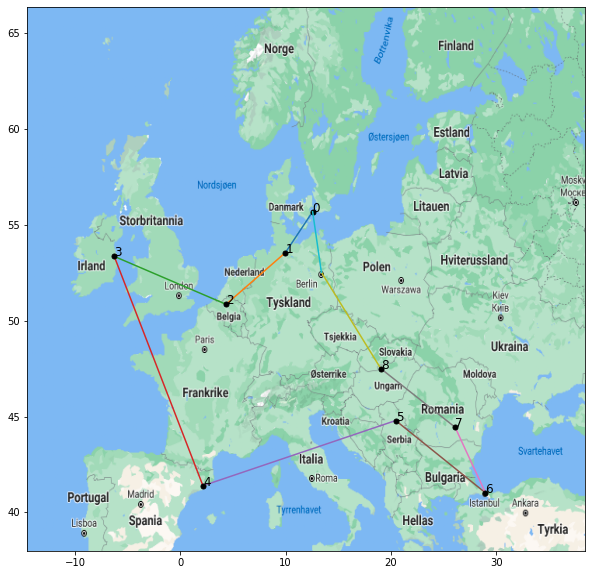

In [146]:
# Answer

#Finding the shortest tour among the 10 first cities

def first_ten():
    """A function that performs an exhaustive search on the ten first cities to find the shortest route.

    The function performs exhaustive search and prints input, the best tour, and amount of time in seconds

    Returns:
        path      : list of strings containing cities
        distance  : the shortest distance found by ES
        total_time: the time it took in seconds to find the solution
    """
    path, distance, total_time = exhaustive_search(cities[0:10])
    print(f"It took {total_time} seconds (or {total_time/60} minutes) to find the shortest tour of the {len(cities[0:10])} first cities")
    print("cities:")
    print(cities[0:10])
    print("optimized tour:")
    print(path)
    plot_plan(path)
    return path, distance, total_time

def es_24():
    """A function that approximates the time to perform an exhaustive search on all 24 cities.

    The function computes the amount of permutations for all 24 cities and multiplies it by the time
    it takes to perform exhaustive search on one city.

    Returns:
        approx : float number of seconds it takes to compute ES on all cities.
    
    """
    print("We can calculate the computation time of all 24 cities by calculating the computation time between 2 cities, and multiplying it by 24!:")
    path, distance, total_time = exhaustive_search(cities[0:1])
    print("copmtation time in seconds:", total_time)
    approx = total_time * (np.math.factorial(24)) 
    print("approximate seconds it would take to perform exhaustive search on all 24 cities:", approx ,"seconds")
    print("or", approx/60, "minutes")
    return approx
    
approx_es_24_t = es_24()
print("------------")
ES_first_ten_path, ES_first_ten_distance, ES_first_ten_total_time = first_ten()

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

For one run of Hill Climb, and 10000 iterations
ES-distance: 7486.309999999999 vs. HC-distance: 7767.159999999999
ES-time: 200.0342662334442 seconds vs. HC-time: 3.0720338821411133 seconds
---------------------
------------
Computing for 10 cities:
best distance of 20 runs is 9738.51
worst distance of 20 runs is 15275.19
mean distance of 20 runs is 12796.9675
standard deviation distance of 20 runs is 1406.034533707743
distance of plotted path: 11644.400000000001
------------
Computing for 24 cities:
best distance of 20 runs is 25066.069999999996
worst distance of 20 runs is 37232.69
mean distance of 20 runs is 30768.018499999987
standard deviation distance of 20 runs is 2740.692434948284
distance of plotted path: 30334.560000000005


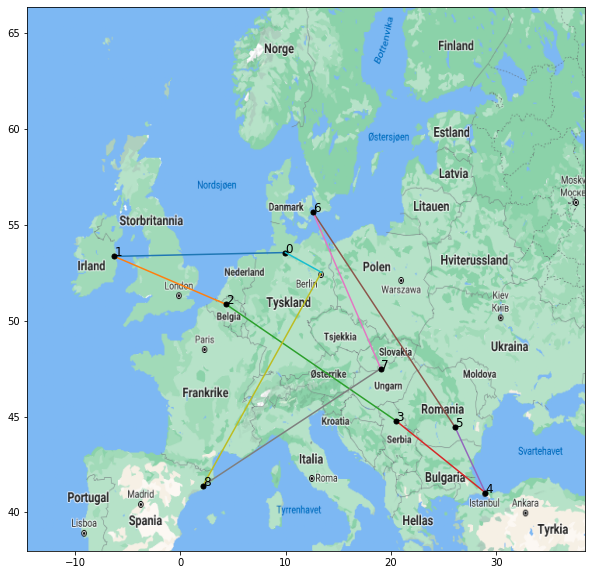

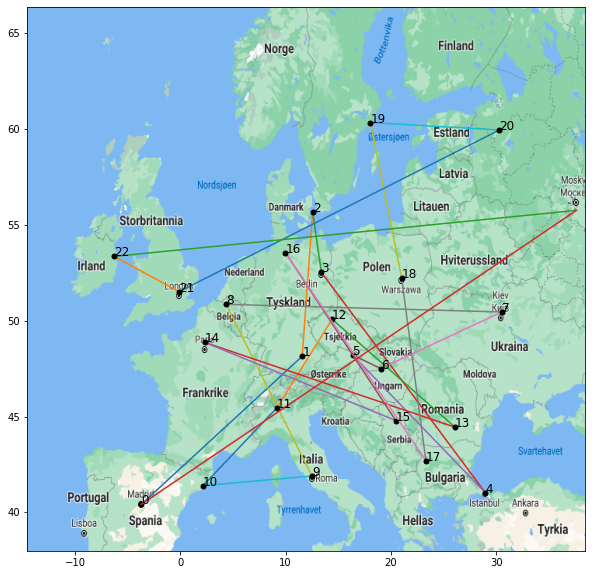

In [147]:
# Implement the algorithm here
from itertools import permutations
import time 
import random

cities = list(city_coords.keys())
distances = data[1:]

#From homework - week 3
def swap_mutation(permutation):
    """Performs a swap mutation on a permutation genotype
    
    Pick two cities at random and swap their positions
    
    Args:
        permutation: A list of permutations
        
    Returns:
        permutation: The same list, but modified.   
    """
    locuses = np.random.choice(len(permutation), 2, replace=False)
    permutation[locuses[0]], permutation[locuses[1]] = permutation[locuses[1]], permutation[locuses[0]]
    return permutation

def HillClimb(cities, iterations = 1000):
    """ Performs a hill climb on a list of given cities, with N iterations.

    Picks a random permutation and its neighbouring permutations in order to calculate their distances.
    The permutation with the best distance will get picked and will again be compared to its neighbours. 

    Args:
        cities      : list of strings with the names of the cities
        iterations  : integer that determines the amount of iterations

    Returns:
        The optimized tour, the total distance of the tour, and time of completion in seconds
    """
    start = time.time()
    path = None
    best_distance = float("inf")
    permutation = cities
    random.shuffle(permutation) #random permutation of input
    for i in range(iterations):
        distance = distance_function(permutation)
        if distance < best_distance:
            best_distance = distance
            path = permutation
        permutation = swap_mutation(permutation)
    stop = time.time()
    total_time = stop-start
    return path, best_distance, total_time


def ES_vs_HC(iterations = 10000):
    print("For one run of Hill Climb, and", iterations, "iterations")
    HC_path, HC_dist, HC_t = HillClimb(cities[0:10], iterations)
    print("ES-distance:", ES_first_ten_distance, "vs.", "HC-distance:", HC_dist)
    print("ES-time:", ES_first_ten_total_time, "seconds", "vs.", "HC-time:", HC_t, "seconds")
    print("---------------------")


def HC_stats(runs = 20, iterations = 1000, arg = 1):
    if arg == 1:
        arg_cities = cities[0:10]
    elif arg == 0:
        arg_cities = cities
    distances = []
    paths = []
    times= []
    for i in range(runs):
        HC_path, HC_dist, HC_t = HillClimb(arg_cities, iterations)
        distances.append(HC_dist)
        paths.append(HC_path)
        times.append(HC_t)
    best_dist = min(distances)
    worst_dist = max(distances)
    mean_dist = np.mean(distances)
    std = np.std(distances)
    print(f"Computing for {len(arg_cities)} cities:")
    print(f"best distance of {runs} runs is {best_dist}")
    print(f"worst distance of {runs} runs is {worst_dist}")
    print(f"mean distance of {runs} runs is {mean_dist}")
    print(f"standard deviation distance of {runs} runs is {std}")
    ind = np.random.randint(low = 0, high = len(paths))
    random_path = paths[ind]
    plot_plan(random_path)
    print(f"distance of plotted path: {distances[ind]}")
    
ES_vs_HC()
print("------------")
HC_stats(iterations = 1, arg = 1)
print("------------")
HC_stats(iterations = 1, arg = 0)




    
        
    



## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

population 20
best 7486.3099999999995
worst 8377.24
mean 7712.488
standard deviation 248.31276251131348
------------
population 40
best 7486.3099999999995
worst 8377.24
mean 7637.3875
standard deviation 205.7199585935939
------------
population 60
best 7486.309999999999
worst 8377.24
mean 7596.065833333332
standard deviation 182.79804782228632
------------
We can determine that based on distance and number of generations that a population of 60 is best
This is because we consistently get the best distance with the same amount of generations as all the other variants.


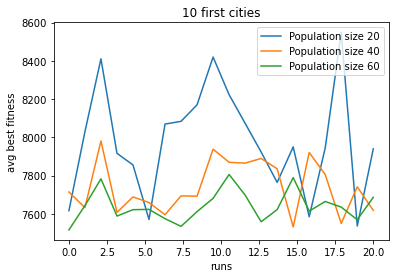

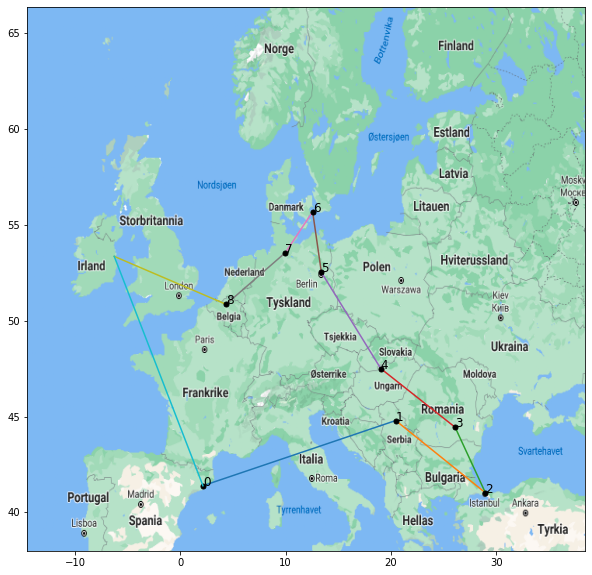

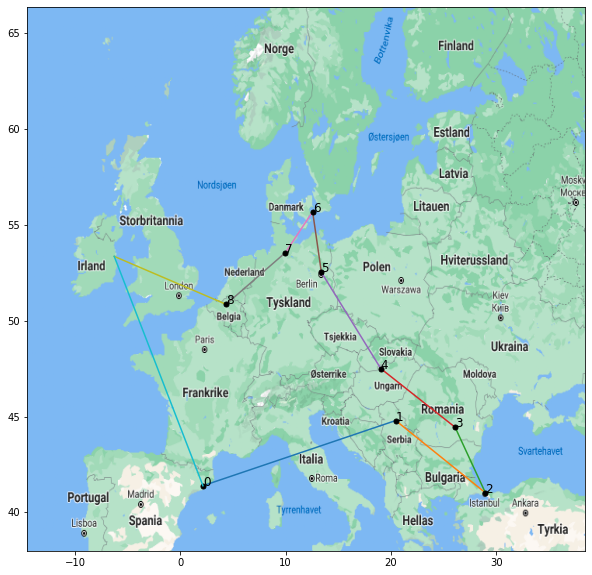

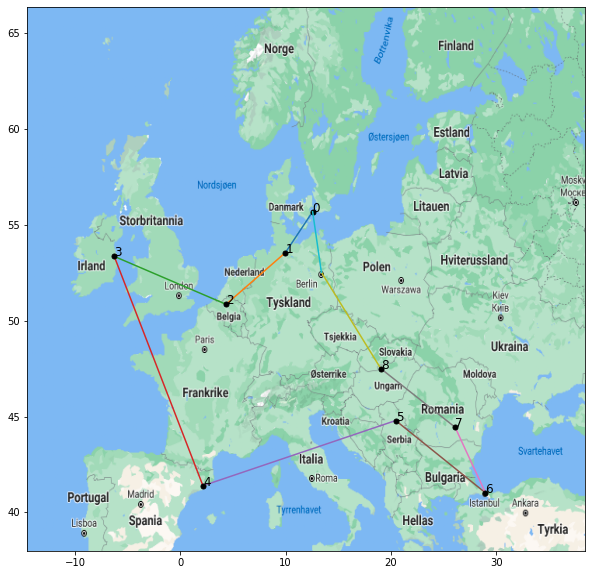

In [148]:
 # Implement the algorithm here
import time
import matplotlib.pyplot as plt
from itertools import permutations, combinations
distances = data[1:]

# Code from homework - week 3
def pmx(a, b, start, stop):
    """A function that performs partially mapped crossover for two parents

    Inputs two permutations as parents, chooses a random section from the first parent and rearranges

    Args:
        a     : parent 1 as a list of permutation
        b     : parent 2 as a list of permutation
        start : starting point of the section
        stop  : stopping point of the section

    Returns:
        The child of the two parents
    """
    child = [None]*len(a)
    
    # Copy a slice from first pair:
    child[start:stop] = a[start:stop]
    
    # Map the same slice in parent b to child using indices from parent a:
    for ind, x in enumerate(b[start:stop]):
        ind += start
        if x not in child:
            while child[ind] != None:
                ind = b.index(a[ind])
            child[ind] = x
    # Copy over the rest from parent b
    for ind, x in enumerate(child):
        if x == None:
            child[ind] = b[ind]
            
    return child


def pmx_pair(a, b):
    """A function that performs a PMX with random sectioning.

    Takes two lists of permutations as parents and creates two children

    Args:
        a : parent 1 
        b:  parent 2
    
    Returns:
        Returns the with a as parent 1 and b as parent 2, and vice versa with the same random sectioning.
    """
    half = len(a) // 2
    start = np.random.randint(0, len(a)-half)
    stop = start+half
    return pmx(a, b, start, stop), pmx(b, a, start, stop)

def scramble_mutation(genotype):
    """Performs a scramble mutation on a permutation genotype
    
    Pick a subset of genes at random, and randomly rearrange the alleles in those positions
    
    Args:
        genotype: A genotype in a permutation format
        
    Returns:
        The genotype after the mutation    
    """
    genotype_copy = genotype.copy()
    locuses = np.random.choice(len(genotype), np.random.randint(2, len(genotype)), replace=False)
    locuses_list = locuses.tolist()
    for locus in locuses:
        if len(locuses_list) == 1:
            genotype[locus] = genotype_copy[locuses_list[0]]
        else:
            genotype[locus] = genotype_copy[locuses_list.pop(np.random.randint(0, len(locuses_list)))]
        
    return genotype

#The same function as a previous cell, but reimplemented for ease of use.
def distance_function(permutation):
    total_distance = 0
    for i in range(len(permutation)):
        curr_city_ind = data[0].index(permutation[i])
        next_city_ind = data[0].index(permutation[(i + 1) % len(permutation)])
        current_distance = float(distances[curr_city_ind][next_city_ind])
        total_distance += current_distance
    return total_distance
cities = list(city_coords.keys())


def GeneticAlgorithm(cities, population, generations, mutation_probability = 0.5):
    """Uses a Genetic Algorithm to find the best tour 

    Takes in a permutation of cities, and uses PMX and Scramble Mutation to find the solution.

    Args:
        cities               : a list of permutation of cities
        population           : amount of permutations/tours for each generation
        generations          : amount of iterations it will cycle through 
        mutation_probability : probability that a product of PMX will be mutated, default 0.5
    
    Returns:
        Returns the best tour, the distance of the tour, amount of time it took in seconds and the
        best tours / individuals for each generation. 
    
    """

    t0 = time.time()
    pop = []; 
    best_individuals = [] #best individual per generation
    #Initialising the population
    for i in range(population):
        rand_perm = list(np.random.permutation(cities))
        perm_distance = distance_function(rand_perm)
        pop.append((rand_perm, perm_distance))
    pop.sort(key=lambda x: x[1])

    for generation in range(generations):
        children = []; perms = []
        #making a list of permutations for the best individuals
        for j in range(len(pop)):
            perms.append(pop[j][0])
        #choosing parents 
        parents = perms[:population//2]
        #performing pmx
        for parent1, parent2 in zip(parents[:len(parents)//2], parents[len(parents)//2 :]):
            children.append(pmx_pair(parent1, parent2)[0])
            children.append(pmx_pair(parent1, parent2)[1])
        #50% chance of performing scramble mutation on the children (default setting)
        for child in children:
            p = np.random.uniform()
            if p < mutation_probability:
                pop.append((scramble_mutation(child), distance_function(child)))
            else:
                pop.append((child, distance_function(child)))
        pop.sort(key=lambda x: x[1])
        pop = pop[: population]
        best_individuals.append(pop[0])
    path = min(best_individuals,key=lambda item:item[1])[0]
    best_distance = min(best_individuals,key=lambda item:item[1])[1]
    t1 = time.time()
    total_time = t1-t0
    return path, best_distance, total_time, best_individuals

#Testing for population: 20, 40, 60
# Assuming that by 'all three variants', the task is refering to the three population-sizes. 
def GA_stats(runs = 20):
    """Function that computes the best, worst, mean and standard deviation of three populations in 20 runs.
        In addition, prints the results and plots the average fitness of the best individual across 20 runs.


    Args:
        runs : the amount of runs for each population
    
    Returns:
        Returns the best tour for each of the populations. 
    """
    sample_distances = []
    sample_paths = []
    best_paths = []
    plt.title("10 first cities")
    plt.xlabel("runs")
    plt.ylabel("avg best fitness")
    for i in range(20, 80, 20):
        avg_fitness = []
        for run in range(runs):
            fitness = []
            curr_path, curr_dist, curr_time, best_individuals_per_gen = GeneticAlgorithm(cities[0 : 10], i, 100)
            sample_distances.append(curr_dist)
            sample_paths.append(curr_path)
            for element in best_individuals_per_gen:
                fitness.append(element[1])
            avg_fitness.append(np.mean(fitness))
        plt.plot(np.linspace(0,20, 20), avg_fitness, label = f"Population size {i}")
        plt.legend()
        best = min(sample_distances)
        worst = max(sample_distances)
        mean = np.mean(sample_distances)
        SD = np.std(sample_distances)
        print("population", i)
        print("best", best)
        print("worst", worst)
        print("mean", mean)
        print("standard deviation", SD)
        print("------------")
        best_paths.append(sample_paths[sample_distances.index(min(sample_distances))])
    print("We can determine that based on distance and number of generations that a population of 60 is best")
    print("This is because we consistently get the best distance with the same amount of generations as all the other variants.")

    return best_paths



#plots the best path for each population
for path in GA_stats():
    plot_plan(path)
plt.show()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [149]:
# Answer
def GA_vs_ES():
    """Function that compares the results of GA and ES for the first 10 cities.  
    
    Performs a GeneticAlgorithm and Exhaustive Search on a list of cities
    and prints the distances for each, and compares the difference.
    """
    GA_p, GA_d, GA_t, GA_best_perms  = GeneticAlgorithm(cities[0:10], 50, 100)
    ES_p, ES_d, ES_t                 = exhaustive_search(cities[0:10])
    print("distance of GA:", GA_d )
    print("distance of ES:", ES_d )
    print("Difference in distance: ", abs(ES_d - GA_d))

def GA_vs_ES_10_and_24_cities():
    """Function that compares GA and ES between first 10 and all cities. 

    Performs a GA on the ten first and all cities, computes the difference between running times
        and compares the running time of the GA and ES
    """
    GA_all_p, GA_all_d, GA_all_t, GA_all_best_perms  = GeneticAlgorithm(cities, 50, 100)#all 24 cities
    GA_ten_p, GA_ten_d, GA_ten_t, GA_ten_best_perms  = GeneticAlgorithm(cities[0:10], 50, 100) #first ten cities
    print("Running time - GA; for 10 first cities: ", GA_ten_t)
    print("Running time - GA; for all 24 cities: ", GA_all_t)
    print("Difference between GA and ES in running time for the ten first cities: ", abs(ES_first_ten_total_time- GA_ten_t ))
    #Using estimated time for all cities - ES computed by hand in a previous task:
    print("Difference between GA and ES in running time for all cities: ", abs(approx_es_24_t - GA_all_t))

def tour_inspection():
    print("Amount of tours visited is based on the generation and population in a GA")
    print("Knowing this; we can simply calculate how many tours generated for each generation")
    print("Example: let population be 50, and generations 100")

GA_vs_ES()
print("------------")
GA_vs_ES_10_and_24_cities()
print("------------")
tour_inspection()

distance of GA: 7486.3099999999995
distance of ES: 7486.309999999999
Difference in distance:  9.094947017729282e-13
------------
Running time - GA; for 10 first cities:  0.996953010559082
Running time - GA; for all 24 cities:  1.6203136444091797
Difference between GA and ES in running time for the ten first cities:  199.03731322288513
Difference between GA and ES in running time for all cities:  2.603505103708509e+19
------------
Amount of tours visited is based on the generation and population in a GA
Knowing this; we can simply calculate how many tours generated for each generation
Example: let population be 50, and generations 100


## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [150]:
# Implement algorithm here